## 0 Prepare Environment

In [1]:
!pip install -U pip
!pip install -U h5py numpy scikit-learn matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## 1 Load Data

In [2]:
import h5py
import numpy as np
with h5py.File('./data/train/images_training.h5', 'r') as H:
    data_train = np.copy(H['datatrain'])
with h5py.File('./data/train/labels_training.h5', 'r') as H:
    label_train = np.copy(H['labeltrain'])
with h5py.File('./data/test/images_testing.h5', 'r') as H:
    data_test = np.copy(H['datatest'])
with h5py.File('./data/test/labels_testing_2000.h5', 'r') as H:
    label_test = np.copy(H['labeltest'])

### 1.1 Data Summary

#### 1.1.1 Training Set

In [3]:
print('data summary of train data')
print('  data type: ', type(data_train))
print('  data shape:', data_train.shape)
print('  sample data:\n', data_train[:3,:])
print('==================================')
print('data summary of label data')
print('  data type: ', type(label_train))
print('  data shape:', label_train.shape)
print('  sample data:\n', label_train[:3])

data summary of train data
  data type:  <class 'numpy.ndarray'>
  data shape: (30000, 784)
  sample data:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
data summary of label data
  data type:  <class 'numpy.ndarray'>
  data shape: (30000,)
  sample data:
 [0 3 7]


#### 1.1.2 Test Data

In [4]:
print('data summary of test data')
print('  data type: ', type(data_test))
print('  data shape:', data_test.shape)
print('  sample data:\n', data_test[:3])
print('================================')
print('data summary of test label')
print('  data type: ', type(label_test))
print('  data shape:', label_test.shape)
print('  sample data:\n', label_test[:3])

data summary of test data
  data type:  <class 'numpy.ndarray'>
  data shape: (10000, 784)
  sample data:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
data summary of test label
  data type:  <class 'numpy.ndarray'>
  data shape: (2000,)
  sample data:
 [1 0 9]


# 2 Data Pre-processing （Feature Engineering）

## 2.1 Keep Top 2000 Rows of Test Data

In [5]:
data_test = data_test[:2000]

## 2.2 Detect Missing Value

In [6]:
print('There are', sum(sum(np.isnan(data_train))) ,'elements in data_train whose value is NAN')
print('There are', sum(np.isnan(label_train)) ,'elements in label_train whose value is NAN')
print('There are', sum(sum(np.isnan(data_test))) ,'elements in data_test whose value is NAN')
print('There are', sum(np.isnan(label_test)) ,'elements in label_test whose value is NAN')

There are 0 elements in data_train whose value is NAN
There are 0 elements in label_train whose value is NAN
There are 0 elements in data_test whose value is NAN
There are 0 elements in label_test whose value is NAN


## 2.3 Detect outliers

In [7]:
print('There are', sum(sum((data_train>1) + (data_train<0))) ,'elements in data_train whose value is not between 0 and 1')
print('There are', sum((label_train>9) + (label_train<0)) ,'elements in data_train whose value is not between 0 and 9')
print('There are', sum(sum((data_test>1) + (data_test<0))) ,'elements in data_train whose value is not between 0 and 1')
print('There are', sum((label_test>9) + (label_test<0)) ,'elements in data_train whose value is not between 0 and 9')

There are 0 elements in data_train whose value is not between 0 and 1
There are 0 elements in data_train whose value is not between 0 and 9
There are 0 elements in data_train whose value is not between 0 and 1
There are 0 elements in data_train whose value is not between 0 and 9


## 2.4 Scaling （standardization）

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_train_s = scaler.fit_transform(data_train)
data_test_s = scaler.transform(data_test)

## 2.5 Decomposition

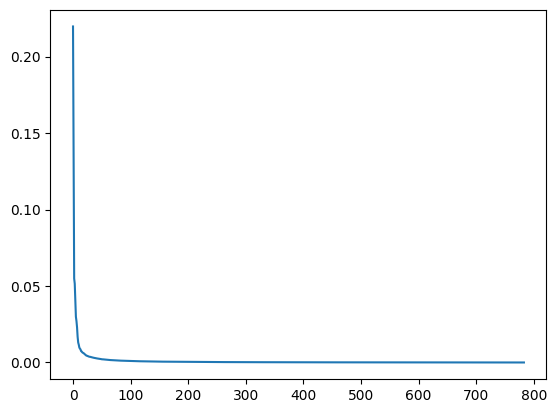

In [9]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
pca = PCA()
data_train_p = pca.fit(data_train_s)
value = pca.explained_variance_ratio_ 
plt.plot(value)
plt.show()

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
data_train_p = pca.fit_transform(data_train_s)
data_test_p = pca.transform(data_test_s)
print('After dimensionality reduction, the data changed from 784 columns to', pca.n_components_,'columns')

After dimensionality reduction, the data changed from 784 columns to 254 columns


# 3 Algorithm selection

## 3.1 Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(data_train_p, label_train)
predict = lr.predict(data_test_p)
print('accuracy: ', sum(predict == label_test)/label_test.shape[0])

accuracy:  0.833


/home/ec2-user/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 3.2 K-nearest Neighbors

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(data_train_p, label_train)
predict = knn.predict(data_test_p)
print('Accuracy: ', sum(predict == label_test)/label_test.shape[0])

Accuracy:  0.8485


## 3.3 Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(data_train_p, label_train)
predict = dt.predict(data_test_p)
print('Accuracy: ', sum(predict == label_test)/label_test.shape[0])

Accuracy:  0.7325


### 3.4 Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
rf.fit(data_train_p, label_train)
predict = rf.predict(data_test_p)
print('Accuracy: ', sum(predict == label_test)/label_test.shape[0])

Accuracy:  0.795
